<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Marcos Ignacio Huenchumil Illanes
- Nombre de alumno 2: Nicolas Fuenzalida Sáez


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/onemoremoka/MDS7202labs/tree/lab7)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto) ✅
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos) ✅
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto) ✅
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto) ✅

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos) ✅
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos) ✅
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos) ✅

In [4]:
! pip install xgboost scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\mihue\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [6]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


De ``df.describe`` se evidencia que las variables ``Age``, ``GenHlthm``, ``MenHlth``, ``PhysHlth`` no se encuetran normalizadas. Esta hetereogenidad puede producir un sesgo en modelos basados en distancia que sobreestimen la influencia de estas variables. Se decide aplicar ``StandardScaler`` sobre estas variables. En ``df.info`` se confirma que no existen valores nulos, por tanto no es necesario aplicar técnicas de imputación de datos.

In [7]:
from sklearn import set_config
set_config(transform_output="pandas") # to display the output as a pandas dataframe

In [8]:
from re import X
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# Verificación de proporciones
print("\nProporciones finales:")
print(f"Train: {len(X_train)/len(X):.1%}")
print(f"Test: {len(X_test)/len(X):.1%}")

# undersampling/oversampling
y.value_counts(normalize=True)


Proporciones finales:
Train: 67.0%
Test: 33.0%


Diabetes
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

En el paso anterior se verificó que la división de los datos entre los conjuntos de entrenamiento y prueba cumpliera la proporción requerida de 1:3. Adicionalmente, se confirmó que el balance de clases fuera similar en ambos conjuntos, específicamente con una relación 1:1. Este último paso es crucial para validar el entrenamiento de un modelo insesgado y métricas representativas.

In [10]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [11]:
from tabnanny import verbose
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

norm_columns = ['Age', 'GenHlth', 'MentHlth', 'PhysHlth']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), norm_columns),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
).set_output(transform="pandas")


In [12]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

#XGboost
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier()),    
])
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], shape=(23329,))

In [34]:
y_proba = model_pipeline.predict_proba(X_test)[:, 1]

In [13]:
#classifier report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     11651
         1.0       0.73      0.79      0.76     11678

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

**Respuestas:**
* El modelo ``XGBClassifier`` entrega un F1-score de 0.75, el cual representa la media armónica de precision/recall aceptable, siendo esta una primera aproximación de la solución, aun deja margen de mejora.

* La funcion `classification_report` entrega métricas de desmpeño claves:
  * ``Precision``: Indica, de todos los pacientes que el modelo predijo con diabetes, qué proporción realmente tenía la enfermedad.
  * ``Recall``: Mide, del total de pacientes que realmente tenían diabetes, qué proporción fue correctamente identificada por el modelo.
  * ``F1-score``: Ofrece una visión balanceada entre precisión y recall a través de su media armónica, útil para evaluar el tradeoff entre ambas métricas.
  * ``Support``: Muestra el número de ocurrencias reales de cada clase en el conjunto de prueba.

* Las métricas utilizadas buscan evaluar el rendimiento (Precision, Recall, F1-score) buscan medir la calidad de la predicción, pero no capturan la influencia de las variables sobre el valor predicho. Por tanto para conocer si las variables utilizadas por el modelo eran las mejores features posibles es necesario acoplar otros métodos que permitan analizar la peso en la predicción de las variables de entrada.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

----

1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)

    **Respuesta**:

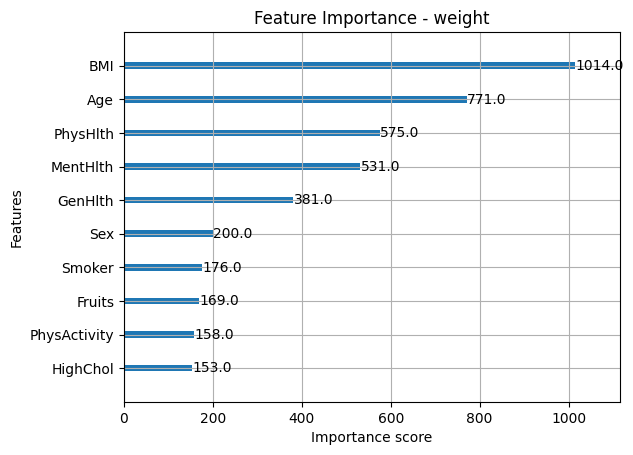

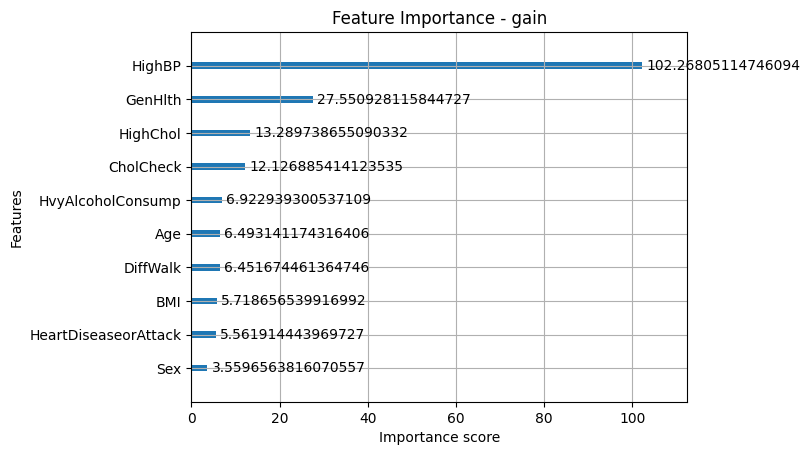

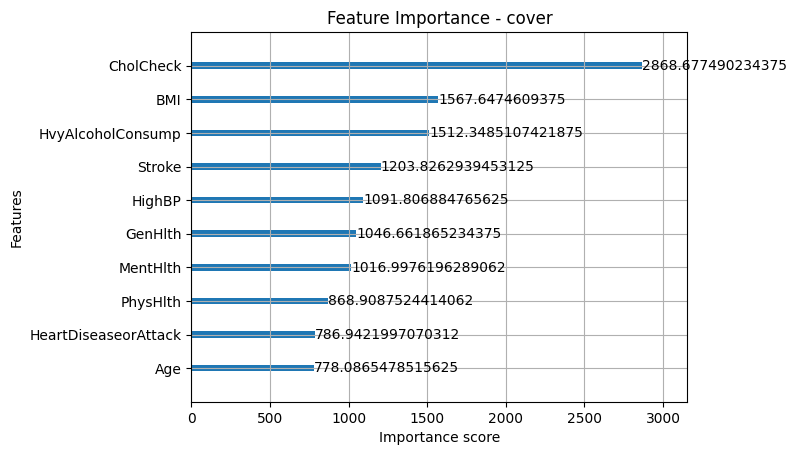

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

xgb_model = model_pipeline.named_steps['model']

for importance_type in ['weight', 'gain', 'cover']:
    plot_importance(xgb_model, importance_type=importance_type, max_num_features=10)
    plt.title(f'Feature Importance - {importance_type}')
    plt.show()


2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)

    **Respuesta**:

    La función ``plot_importance`` entrega un gráfico de la importancia relativa de cada característica utilizada por el modelo ajustado. Estos tres métodos caracterizan diferentes aspectos del valor de la feature y buscan cuantificar distintas formas de interpetar como el modelo usa los datos, por lo que los resultados obtenidos no son comparables entre sí y se deben interpretar según el método de importancia utilizado. 

    *  weight: mide cuantas veces una feature aparece en los split de los arboles. Una feature con más divisiones tiene mayor influencia en las decisiones del modelo, aunque no necesariamente es más útil.

    * gain: es la ganancia promedio que aporta una feature cuando se usa para dividir el arbol. Una alta ganancia indica que la feature es útil para reducir el error.

    * cover: es el promedio de los registros afectados cuando se usa esta característica, indica el alcance de la feature. Un cover alto indica que afecta a muchos registros. De igual forma no implica que sea útil en la decisión.

    Se puede tener una feature con alto cover u alto weight pero que tenga una baja gananacia, es decir, si bien se usa activamente en la toma de decision de XGBoost, no ayuda a disminuir el error de predicción. Por tanto para el análisis  sería util considerar en primera instancia la ganancia y como métricas complementarias cover y weight. Por tanto para este analisis se consdiera las varaibles mas relevantes: 


3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

**Respuesta**: las importancias obtenidas son útiles para una primera aproximación a la interpretabilidad, pero no son suficientes por sí solas. Este método solo me entrega que variables son importantes pero no dicen ni como ni porque afectan a la predicción del modelo. Además, no permite identificar interacciones entre variables ni muestra cómo varía la importancia en distintos subconjuntos del conjunto de datos. 


2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)

    **Respuesta**:

    La función ``plot_importance`` entrega un gráfico de la importancia relativa de cada característica utilizada por el modelo ajustado. Estos tres métodos caracterizan diferentes aspectos del valor de la feature y buscan cuantificar distintas formas de interpetar como el modelo usa los datos, por lo que los resultados obtenidos no son comparables entre sí y se deben interpretar según el método de importancia utilizado. 

    *  weight: mide cuantas veces una feature aparece en los split de los arboles. Una feature con más divisiones tiene mayor influencia en las decisiones del modelo, aunque no necesariamente es más útil.

    * gain: es la ganancia promedio que aporta una feature cuando se usa para dividir el arbol. Una alta ganancia indica que la feature es útil para reducir el error.

    * cover: es el promedio de los registros afectados cuando se usa esta característica, indica el alcance de la feature. Un cover alto indica que afecta a muchos registros. De igual forma no implica que sea útil en la decisión.

    Se puede tener una feature con alto cover u alto weight pero que tenga una baja gananacia, es decir, si bien se usa activamente en la toma de decision de XGBoost, no ayuda a disminuir el error de predicción. Por tanto para el análisis  sería util considerar en primera instancia la ganancia y como métricas complementarias cover y weight. Por tanto para este analisis se consdiera las varaibles mas relevantes: ``highBP``, ``GenHlt``, ``HighChol``, ``CholCheck``, ``HvyAlcoholConsump``.


3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

**Respuesta**: las importancias obtenidas son útiles para una primera aproximación a la interpretabilidad, pero no son suficientes por sí solas. Este método solo me entrega que variables son importantes pero no dicen ni como ni porque afectan a la predicción del modelo. Además, no permite identificar interacciones entre variables ni muestra cómo varía la importancia en distintos subconjuntos del conjunto de datos. 


## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [15]:
def features_names(model_pipeline):
    xgb_model = model_pipeline.named_steps['model']
    return xgb_model.get_booster().feature_names

In [16]:
from sklearn.inspection import permutation_importance

def features_names(model_pipeline):
    xgb_model = model_pipeline.named_steps['model']
    return xgb_model.get_booster().feature_names

def permutation_method_xgboost(pipeline_, X_test, y_test, seed):
    
    result = permutation_importance(
        pipeline_,
        X_test,
        y_test,
        n_repeats=30,
        random_state=seed,
        n_jobs=-1
    )

    print(features_names(model_pipeline))
    return result

results = permutation_method_xgboost(model_pipeline, X_test, y_test, 42)

['Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP']


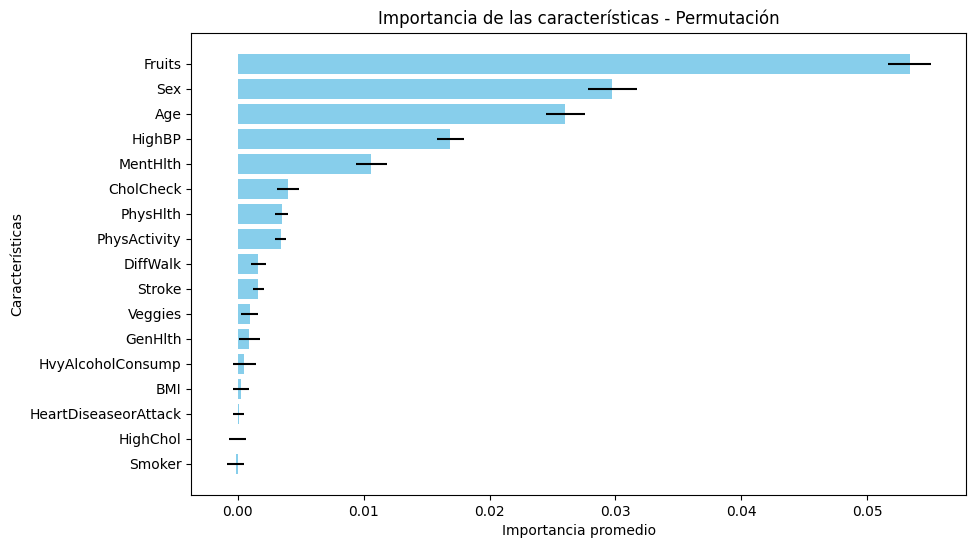

In [17]:
def plot_permutation_importance(result, feature_names):
    importances_mean = result.importances_mean
    importances_std = result.importances_std
    
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(importances_mean)[::-1]
    plt.barh(np.array(feature_names)[sorted_idx], importances_mean[sorted_idx], xerr=importances_std[sorted_idx], color='skyblue')
    plt.gca().invert_yaxis()
    
    plt.title('Importancia de las características - Permutación')
    plt.xlabel('Importancia promedio')
    plt.ylabel('Características')
    plt.show()

feature_names_list = features_names(model_pipeline)
plot_permutation_importance(results, feature_names_list)

4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

  **Respuesta**: 

  - La importancia de las features con el método de permutación se mide observando el cambio en el rendimiento del modelo una vez se desordena una de las características del conjunto de datos. Esto se refiere a cambiar aleatoriamente los valores de una features específica, mientras mantenemos las demas características intactas, lo cual simula el deshacer la relación intrínseca entre esa característica y la variable objetivo. Si el modelo tiene mucho peor rendimiento luego de permutar la feature ``X`` entonces esa feature es relevante para el modelo, ya que su permutación afecta considerablemente el desempeño.

  - Las cinco features con mayor impacto en el modelo son: ``Fruits``, ``Sex``, ``Age``, ``HighBP``, ``MentHlth``. Estas destacan consdierablemente sobre las demas características respecto a importancia promedio. Se puede apreciar que dentro de los 30 repeticiones del experimento la desviación estandar se mantiene cerca del valor promedio por tanto su importancia es consistente.

    Estas variables si hace sentido que tengan tanta importancia en la predicción del modelo. En particular se consisera que: Fruits indica si la persona consume fruta al menos una vez al dia; una alimentación saludable ayuda a prevenir la diabetes. Sex representa el sexo del paciente, el cual puede influir en el riesgo de diabetes debido a diferencias hormonales y condiciones como la **diabetes gestacional**. Age es un factor de riesgo directo, ya que la probabilidad de desarrollar diabetes aumenta con la edad, debido a que a mayor edad se empiezan algunas organos o celulas que forman parte del metabolismo comienza a fallar. HighBP (High Bloot Preasure) señala si el individuo ha sido diagnosticado con hipertensión, una condición estrechamente relacionada con la diabetes dentro del síndrome metabólico. Por último, MentHlth (Metal Health) mide cuántos días del último mes la salud mental fue mala; el estrés o la depresión pueden favorecer hábitos poco saludables que elevan el riesgo de diabetes.

  - Los resultados respecto al metodo anterior de ``plot_importance`` respecto al tipo ``gain`` son completamente distintos, donde solo se comparte la feature ``HighBP``. El método anterior cuantifica como impacta cada feature en la función objetivo de entrenamiento, lo cual puede llevar a asobrevalorar una característica dentro del dataset particular. En cambio, el método de permutación es más interpretativo y realiza una medición directa del impacto de cada feature en el rendimiento del modelo en el conjunto de test.

  - ventajas: ~modelo agnostico~, se puede aplicar sobre cualquier ``Pipeline``, no solo arboles de decisión, ya que evalua el rendimiento del modelo sin conocer sus parámetros internos. Mayor interpretabilidad: mide el impacto real de cada varaible en el rendimiento del modelo. interacción entre variables: al variar una varaible y mantener el resto fijas, permite capturar la importancia dentro de un contexto.

    desventajas: Sensibilidad al azar: los resultados pueden variar entre ejecuciones, por lo que se necesitan varias repeticiones para obtener resultados fiables.  mayor costo computacional: para tener mayor fiabilidad se debe repetir la permutación (en este caso 30 veces).No capta la correlación: si dos variables estan correlacionas,s e puede subestimar el impacto de una de ellas al realizar la permutación, ya que su información ya  se explica por otra feature.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calQcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [18]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\mihue\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calQcular los *shap values* de su modelo. (2 puntos)

    **Respuesta**:

In [20]:
import shap

explainer = shap.Explainer(model_pipeline.named_steps['model'])
x_test_transformed = preprocessor.transform(X_test)
shap_values = explainer(x_test_transformed)

C:\Users\mihue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


``shap_values`` contiene una matrix donde cada número representa el shap value de una feauture para un paciente en particular. Para ejemplificar se visualiza el shap value para el registro 0.

In [21]:
shap_values[0]

.values =
array([ 0.19122018,  1.059766  ,  0.05725629,  0.16662425, -0.12432305,
        0.3137565 ,  0.02264776, -0.69601214, -0.01167411, -0.02745779,
        0.03774819,  0.04084934, -0.02165348,  0.044429  , -0.06007885,
       -0.02158856, -0.655151  ], dtype=float32)

.base_values =
np.float32(-0.009056417)

.data =
array([ 0.49892888,  1.0501395 , -0.46024887, -0.57471605,  0.        ,
        1.        ,  1.        , 23.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [22]:
shap_values[1]

.values =
array([ 0.6348514 ,  0.23844226,  0.0418565 , -0.01089665, -0.12728685,
       -0.29119697,  0.01930101,  0.5168076 ,  0.02817983, -0.07057241,
        0.02806747, -0.00731437, -0.04295021,  0.02025708,  0.11921006,
       -0.01595894, -0.61570835], dtype=float32)

.base_values =
np.float32(-0.009056417)

.data =
array([ 1.55049387,  0.15190828, -0.46024887, -0.27568633,  0.        ,
        0.        ,  1.        , 33.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ])

2. ¿Qué representa cada número en su resultado? (1 punto)

**Respuesta**: ``.base_values`` esta representa la predicción promedio del modelo antes de considerar ninguna feature. Corresponde a un baseline para todos los paciente, basado en los datos de entrenamiento. ``.data`` es el vector de entrada real del paciente, con las features ya preprocesadas. ``.values`` es el shap value  del paciente, corresponde a la contribución individual de cada feature en la predicción del paciente, cada valor indica cuanto cambia la predicción respecto al valor base.



3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

**Respuesta**: Si, el shap_value además de indicar la contribución de esa característica en magnitud, su signo indica la dirección de su contribución, donde un shap value positivo indica que aumenta la probabilidad de la variable objetivo (diabetes). Por el contrario, un shap value negativo indica que la característica disminuye la probabilidad de diabetes.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

----

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

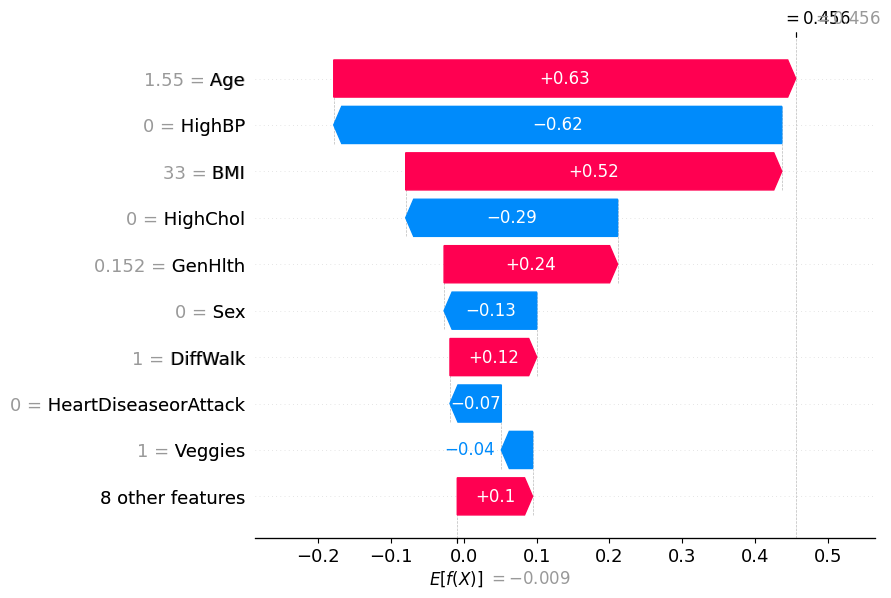

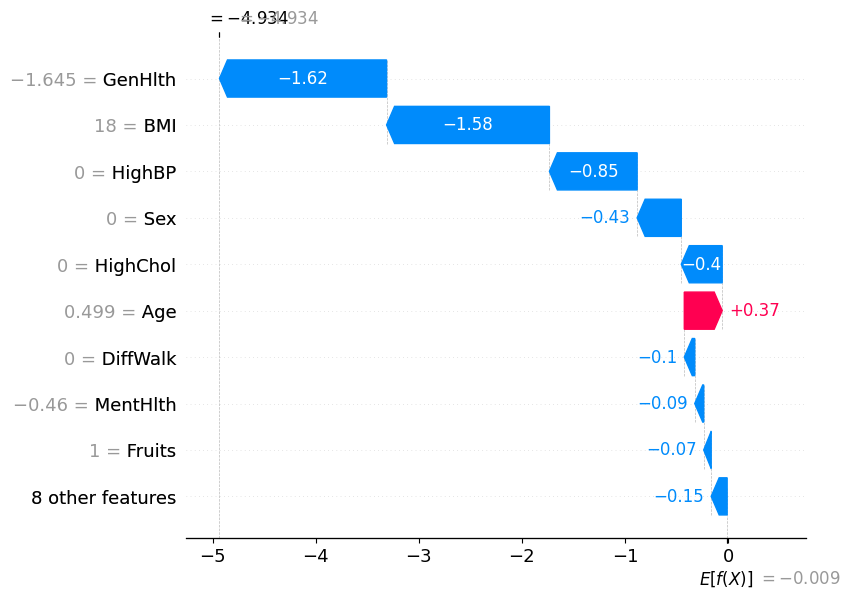

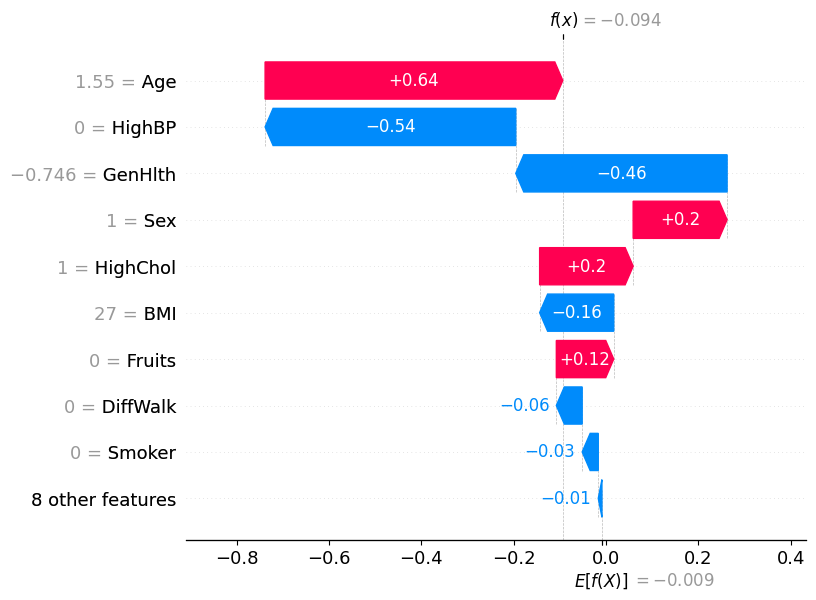

In [23]:
shap.plots.waterfall(shap_values[1])
shap.plots.waterfall(shap_values[9])
shap.plots.waterfall(shap_values[150])

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

    **Respuesta**:

    Este gráfico ``force plot vertical waterfall`` corresponde a una explicación local que muestra como contribuye cada feature al resultado final del modelo para instancias particulares. Un valor común corresponde a
    ``base_value`` de -0.009 es la predicción media del modelo. Cada barra indica si la feature suma o resta respecto a la predicción base. La suma de todas las contribución entrega el valor de la predicción final. 

    - instancia 1: ``Age`` contribuye en +0.63. ``BMI`` contribuye en +0.52. ``GenHlth`` contribuye en +0.24. ``DiffWalk`` contribuye en +0.12. y una contribución conjunta de las otras características de +0.1. Por otro lado ``HighBP`` contribuye -0.63. ``HighChol`` contribuye en  -0.29. ``Sex`` contribuye en -0.13. ``HeartDiseaseorAttack`` contribuye en -0.07. ``Veggies`` contribuye en -0.04. Todas estas contribuciones entregan un final valor predicho de 0.456.

    - insntancia 2: la variable ``GenHlth`` contribuye en –1.62. ``BMI`` en –1.58, ``HighBP`` en –0.85, ``Sex`` en –0.43, ``HighChol`` en –0.40, ``DiffWalk`` en –0.10, ``MentHlth`` en –0.09, ``Fruits`` en –0.07, y una contribución conjunta de las otras características de –0.15. Por otro lado, ``Age`` es la única característica que aumenta la predicción, con una contribución de +0.37. Todas estas contribuciones suman para entregar un valor final predicho de aproximadamente –4.93.

    - instancia 3: la variable ``Age`` contribuye en +0.64, ``Sex`` en +0.20, ``HighChol`` en +0.20 y ``Fruits`` en +0.12, mientras que las otras características aportan en conjunto un valor de -0.01. Por otro lado, ``HighBP`` contribuye en –0.54, ``GenHlth`` en –0.46, ``BMI`` en –0.16, ``DiffWalk`` en –0.06, ``Smoker`` en –0.03. Todas estas contribuciones llevan a un valor final predicho de aproximadamente –0.094.

  - En las tres instancia se observa que ``Age`` siempre tiene una contribución positiva, es decir a mayor edad mayor es la predicción de riesgo de diabetes. ``HighBP`` siempre tiene una contribución negativa, por tanto entre mayor que tener precisión alta aumenta el riesgo de diabetes. ``DiffWalk`` en los tres tiene un efecto muy cercano a 0, lo cual siguiere que si bien representa una implicancia, no es tan relevante como otras features.

  - No se puede generalizar los patrones encontrados en representaciones locales al resto del dataset. Los shap values son utiles para visualizar como cambia una predicción respecto al promedia para una instancia específica, pero no refleja la importancia global de las variables del modelo.



### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

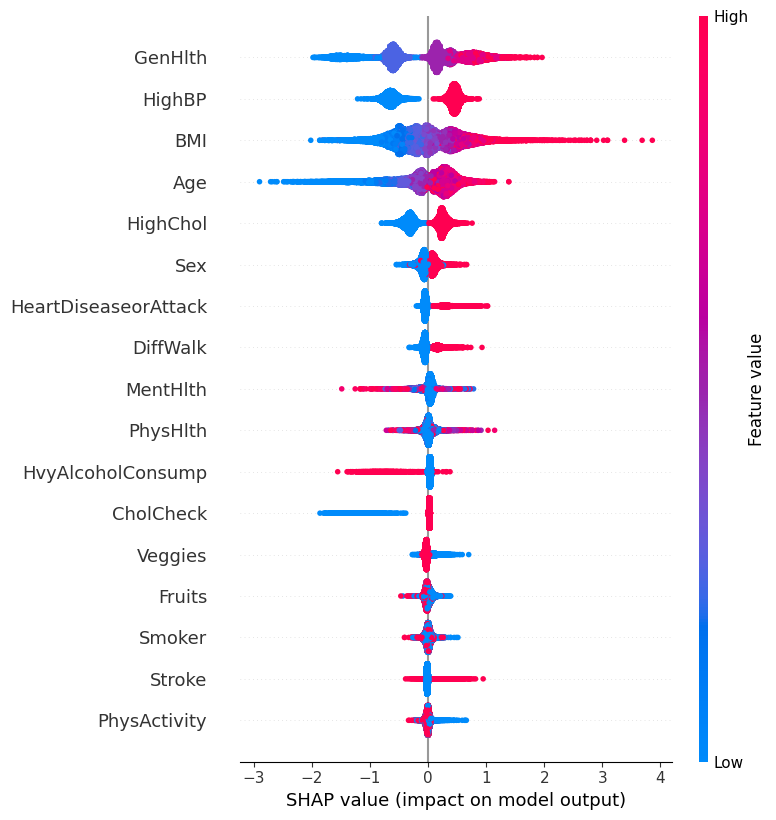

In [24]:
explainer = shap.Explainer(model_pipeline.named_steps['model'])
x_test_transformed = preprocessor.transform(X_test)
shap_values = explainer(x_test_transformed)

shap.summary_plot(shap_values, x_test_transformed)

**Respuesta**:

El ``summary_plot`` entrega una bista global de la contribución de todas las features en el modelo predictivo. En el eje Y se listas las features ordenadas según su importancia desde arriba hacia abajo (la media del valor absoluto de la sumatoria de los shap values). El eje X entrega el shap value promedio de cada feature. Los valores positivos empujan a la predicción a una mayor probabilidad, mientras valores negativos hacia una menor.

La variable más importante es ``GenHlth``, ``HighBP``, ``BMI`` y ``Age``. Respecto a las representaciones locales, los resultados son concistentes a lo que se observa a nivel de instancia. A pesar de que la dirección dde la contribución varia depediendiendo de la instancia al menos 3 de las 4 variables globales también estan presentes dentro de las variables locales más importantes de los casos anteriores. Sin embargo, es importante destacar que el análisis global no puede ser extrapolado directamente a casos individuales, ya que la interacción entre variables y su impacto específico puede variar significativamente según el contexto particular de cada observación.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [31]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\mihue\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


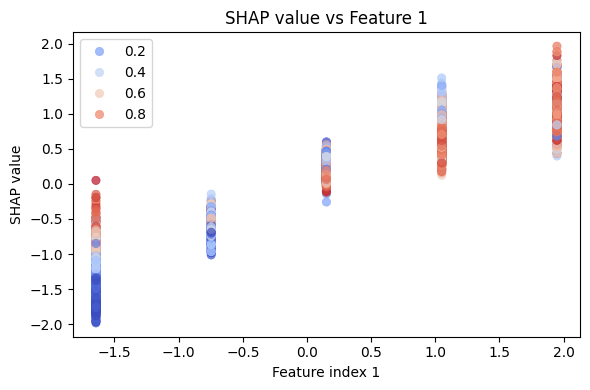

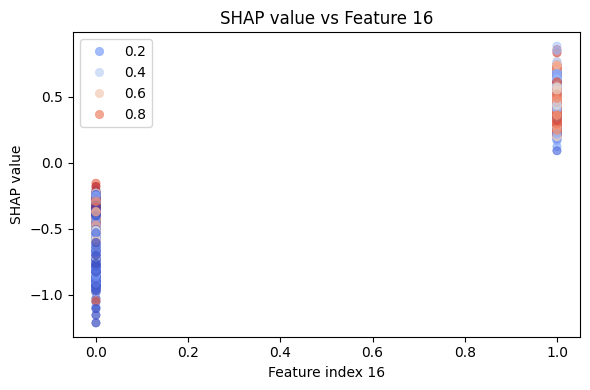

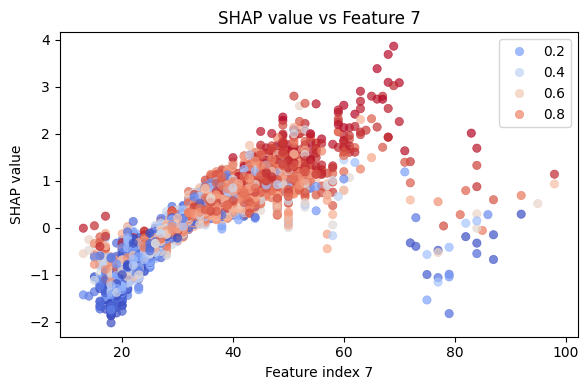

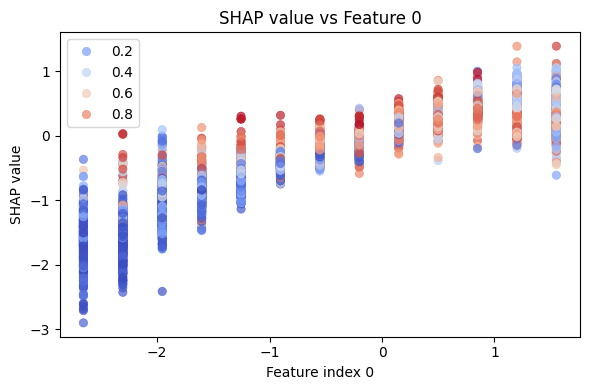

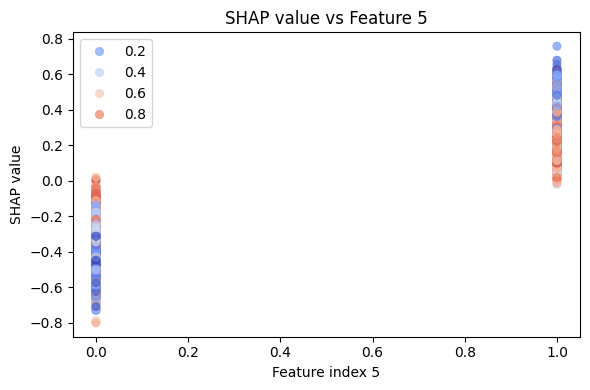

In [45]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xgb_model = model_pipeline.named_steps['model']
preprocessor = model_pipeline.named_steps['preprocessor']

X_test_transformed = preprocessor.transform(X_test).to_numpy()

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_transformed)

importance = np.abs(shap_values.values).mean(axis=0)
top5_indices = np.argsort(importance)[-5:][::-1]

y_proba = model_pipeline.predict_proba(X_test)[:, 1]

for i in top5_indices:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=X_test_transformed[:, i],
        y=shap_values.values[:, i],
        hue=y_proba,
        palette='coolwarm',
        alpha=0.7,
        edgecolor=None
    )
    plt.xlabel(f'Feature index {i}')
    plt.ylabel('SHAP value')
    plt.title(f'SHAP value vs Feature {i}')
    plt.tight_layout()
    plt.show()


### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
xgb_model = model_pipeline.named_steps['model']
preprocessor = model_pipeline.named_steps['preprocessor']

X_test_transformed = preprocessor.transform(X_test).to_numpy()

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_transformed)

importance = np.abs(shap_values.values).mean(axis=0)
top5_indices = np.argsort(importance)[-5:][::-1]

instances_sampling = np.random.choice(X_test_transformed.shape[0], size=1000, replace=False)
X_sample = np.argsort(instances_sampling)[-5:][::-1]


## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [27]:
!pip install alibi

  Using cached alibi-0.9.6-py3-none-any.whl.metadata (22 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached spacy-3.8.5-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached blis-0.7.11-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
  Using cached scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2025.5.10-py3-none-any.whl.

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\mihue\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
from alibi.explainers import AnchorTabular

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>